In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [138]:
df=pd.read_csv('arquivo_final_analise.csv')

In [140]:
conta_ano=pd.pivot_table(df,index='ano',columns='categoria',values='valor',aggfunc='sum',fill_value=0)
conta_ano.columns.name=None
conta_ano.reset_index(inplace=True)
conta_ano.to_csv('conta_ano.csv',index=False)

In [141]:
conta_ano['total']=conta_ano.iloc[:,2:].sum(axis=1)

for coluna in conta_ano.iloc[:,1:11]:
    conta_ano[f'p{coluna}']=((conta_ano[coluna]/conta_ano['total'])*100).round(2)

In [142]:
conta_ano_novo= conta_ano.drop(conta_ano.columns[1:12], axis=1)

In [143]:
conta_ano_novo

,ano,pAmarelos,pAzuis / Cianos,pBrancos,pCinzas,pMarrons,pPreto,pPúrpuras,pRosas,pVerdes,pVermelhos
0,1905,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1956,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
2,1957,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
3,1958,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1960,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
63,2020,1.17,0.87,0.00,51.31,28.86,1.17,4.08,0.00,9.91,3.79
64,2021,0.98,1.31,0.00,46.89,25.25,0.98,4.26,0.00,20.00,1.31
65,2022,1.01,2.51,0.00,42.71,31.16,2.51,4.52,0.00,12.56,4.02
66,2023,1.29,1.29,0.43,50.64,28.33,1.72,7.30,0.00,8.58,1.72


In [ ]:
conta_ano_melted=pd.melt(conta_ano_novo
,id_vars='ano',var_name='cores',value_name='quantidade')
conta_ano_melted.to_csv('formato_flourish_visualiza.csv',index=False)

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot

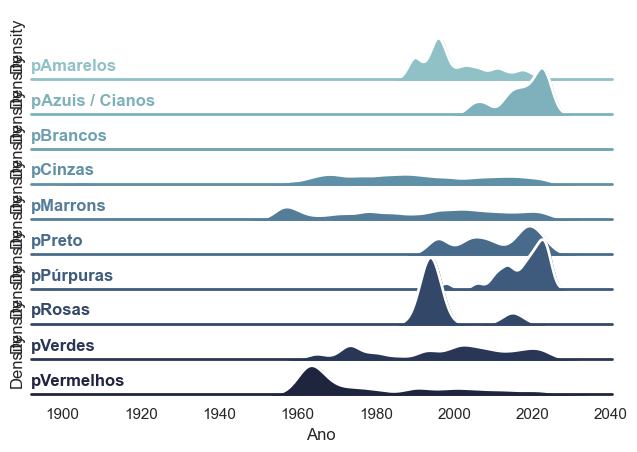

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de estilo
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df=conta_ano_melted

# Expandir o DataFrame para lidar com densidade com base na quantidade
df_expanded = df.loc[df.index.repeat(df["quantidade"])].reset_index(drop=True)

# Paleta de cores (uma para cada cor)
pal = sns.cubehelix_palette(len(df["cores"].unique()), rot=-0.25, light=0.7)

# Inicializar o FacetGrid
g = sns.FacetGrid(df_expanded, row="cores", hue="cores", aspect=15, height=0.5, palette=pal)

# Plotar densidades para cada cor ao longo do tempo (anos)
g.map(sns.kdeplot, "ano", clip_on=False, shade=True, alpha=1, lw=1.5, bw_adjust=0.5)
g.map(sns.kdeplot, "ano", clip_on=False, color="w", lw=2, bw_adjust=0.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Adicionar rótulos às linhas
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "ano")

# Ajustar espaçamento entre subplots
g.fig.subplots_adjust(hspace=-0.5)

# Configurações finais do gráfico
g.set_titles("")
g.set(yticks=[], xlabel="Ano")
g.despine(bottom=True, left=True)

# Mostrar o gráfico
plt.show()

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot

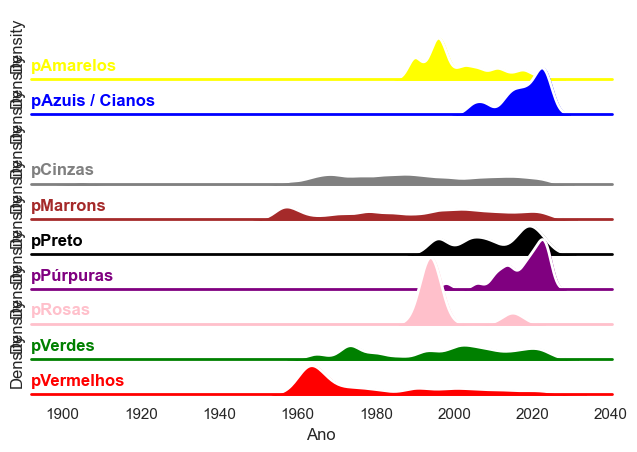

In [151]:
# Expandir o DataFrame para lidar com densidade com base na quantidade
df_expanded = df.loc[df.index.repeat(df["quantidade"].astype(int))].reset_index(drop=True)

# Paleta personalizada com cores específicas
paleta_personalizada = {
    "pAmarelos": "yellow",
    "pAzuis / Cianos": "blue",
    "pCinzas": "gray",
    "pMarrons": "brown",
    "pPreto": "black",
    "pPúrpuras": "purple",
    "pRosas": "pink",
    "pVerdes": "green",
    "pVermelhos": "red",
    "pBrancos": "white"
}

# Inicializar o FacetGrid
g = sns.FacetGrid(df_expanded, row="cores", hue="cores", aspect=15, height=0.5, palette=paleta_personalizada)

# Plotar densidades para cada cor ao longo do tempo (anos)
g.map(sns.kdeplot, "ano", clip_on=False, shade=True, alpha=1, lw=1.5, bw_adjust=0.5)
g.map(sns.kdeplot, "ano", clip_on=False, color="w", lw=2, bw_adjust=0.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Adicionar rótulos às linhas
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "ano")

# Ajustar espaçamento entre subplots
g.fig.subplots_adjust(hspace=-0.5)

# Configurações finais do gráfico
g.set_titles("")
g.set(yticks=[], xlabel="Ano")
g.despine(bottom=True, left=True)

# Mostrar o gráfico
plt.show()